# Unsupervised Learning - Segmentation
## Dataset: Fifa 19
#### source:
https://www.kaggle.com/karangadiya/fifa19

#### Reading File

In [1]:
import pandas as pd
data = pd.read_csv('../Data/fifa19.csv')

In [3]:
data.shape

(18207, 89)

In [2]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [14]:
drop_columns = [
                'Unnamed: 0','Photo', 'Flag', 'Club Logo', 
                'Body Type', 'Real Face', 'Jersey Number', 
                'Joined', 'Loaned From', 'Work Rate', 
                'Contract Valid Until'
                ]

In [15]:
data = data.drop(columns=drop_columns)

In [19]:
nulls = data.isnull().sum().loc[lambda x: x > 0]
with pd.option_context('display.max_rows', 999):
    print(nulls)

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Position                      60
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
RDM                         2085
RWB                         2085
LB                          2085
LCB       

In [20]:
mask = data.query('Position != Position')
data.drop(mask.index, axis=0, inplace=True)

GK -> 1
DF -> 2
WB -> 3
DMF -> 4
MF -> 5
FW -> 6

In [21]:
pos_simp = [6, 5, 4, 3, 2, 1]
pos_comp = [
            ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF'], 
            ['RCM', 'LCM', 'CAM', 'RM', 'LAM', 'LM', 'CM', 'RAM'],
            ['LDM', 'CDM', 'RDM'],
            ['RCB', 'CB', 'LCB', 'LB'],
            ['RB', 'RWB', 'LWB'],
            ['GK']
            ]

In [22]:
pos_dict = dict(zip(pos_simp, pos_comp))

In [23]:
pos_dict

{6: ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF'],
 5: ['RCM', 'LCM', 'CAM', 'RM', 'LAM', 'LM', 'CM', 'RAM'],
 4: ['LDM', 'CDM', 'RDM'],
 3: ['RCB', 'CB', 'LCB', 'LB'],
 2: ['RB', 'RWB', 'LWB'],
 1: ['GK']}

In [24]:
def getkey(x):
    for i in range(len(list(pos_dict.items()))):
        if x in list(pos_dict.items())[i][1]:
            return list(pos_dict.items())[i][0]

In [25]:
data['Position'] = data['Position'].apply(getkey)

In [26]:
data.shape

(18147, 78)

In [31]:
columns_select = [
                'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing',
                'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
                'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
                'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                ]

In [32]:
data_select = data[columns_select]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
predicted = kmeans.predict(X_std)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(2)
pc = pca.fit_transform(X_std)

In [44]:
pca.explained_variance_ratio_.sum()

0.6988693565701999

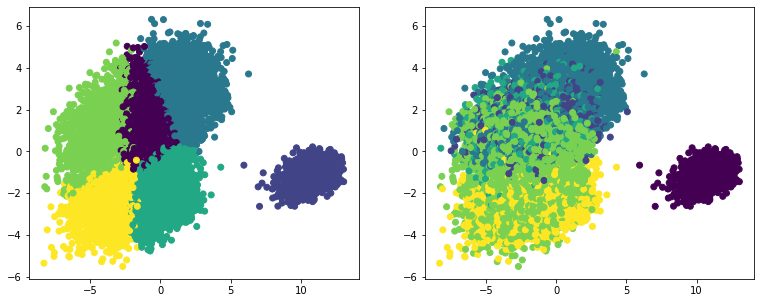

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(13,5))

ax[0].scatter(pc[:, 0], pc[:, 1], c=kmeans.labels_)
ax[1].scatter(pc[:, 0], pc[:, 1], c=data.Position)

In [45]:
kmeans.n_iter_

37

In [41]:
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df.groupby('cluster').mean()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
cluster,,,,,,,,,,,,,,,,,,,,,
0,55.681841,40.684623,56.042994,63.240010,38.584471,58.937026,47.327011,42.024532,58.413758,61.864441,...,45.129995,57.965099,60.586242,63.408194,61.563986,10.574102,10.590794,10.507840,10.573343,10.566262
1,14.257284,12.016296,14.368889,27.269136,12.397037,13.856296,14.707654,14.464198,25.808395,19.949630,...,20.007407,45.122469,15.225185,14.141235,14.072099,65.323951,62.868148,61.477531,63.047407,66.101728
2,37.717219,27.328890,61.880403,53.110231,28.930115,41.521974,32.040706,30.963977,46.672190,49.917507,...,38.684798,53.787824,61.820965,64.833213,62.480908,10.419669,10.462896,10.417507,10.454971,10.413184
3,47.335619,57.460891,50.828607,56.112184,48.850732,60.685260,47.637270,40.988470,46.349330,60.359925,...,55.269866,53.569025,31.514490,28.450919,27.287005,10.228420,10.337488,10.349018,10.311935,10.272982
4,65.710624,55.397976,60.567960,72.297133,54.588870,68.434401,63.970658,59.453288,68.999325,71.458347,...,57.966610,69.436088,66.106239,68.752108,65.911298,10.641147,10.640809,10.687690,10.715683,10.626644
5,62.812617,67.398384,57.159105,67.748912,62.813238,71.747980,64.545681,58.628962,59.237104,71.528278,...,63.825668,67.333437,36.967371,34.545681,31.183654,10.614357,10.735550,10.790242,10.583903,10.645432
